<a href="https://colab.research.google.com/github/zugzwang03/Machine-Learning-Materials/blob/main/linear_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

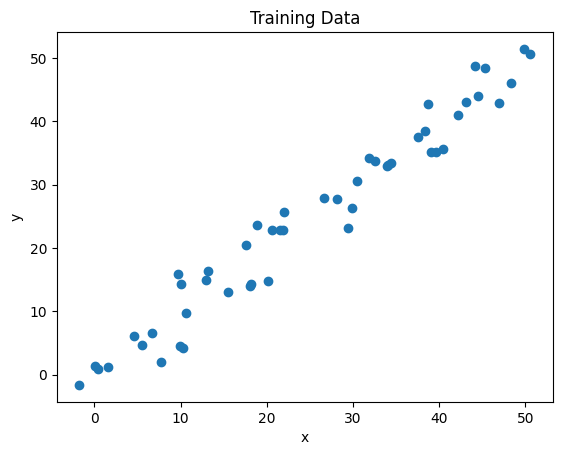

In [19]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
np.random.seed(101)

x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [21]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

learning_rate = 0.01
training_epochs = 1000

y_pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:

	sess.run(init)

	for epoch in range(training_epochs):

		for (_x, _y) in zip(x, y):
			sess.run(optimizer, feed_dict = {X : _x, Y : _y})

		if (epoch + 1) % 50 == 0:
			c = sess.run(cost, feed_dict = {X : x, Y : y})
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

	training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
	weight = sess.run(W)
	bias = sess.run(b)

Epoch 50 : cost = 5.2335815 W = 1.0273161 b = -0.33595607
Epoch 100 : cost = 5.2369714 W = 1.0268768 b = -0.31447834
Epoch 150 : cost = 5.24013 W = 1.0264845 b = -0.2952952
Epoch 200 : cost = 5.243056 W = 1.0261341 b = -0.2781603
Epoch 250 : cost = 5.2457495 W = 1.0258211 b = -0.26285738
Epoch 300 : cost = 5.2482195 W = 1.0255415 b = -0.24918896
Epoch 350 : cost = 5.25048 W = 1.0252919 b = -0.2369803
Epoch 400 : cost = 5.2525396 W = 1.0250689 b = -0.22607571
Epoch 450 : cost = 5.2544127 W = 1.0248697 b = -0.21633609
Epoch 500 : cost = 5.256114 W = 1.0246918 b = -0.20763676
Epoch 550 : cost = 5.257653 W = 1.0245329 b = -0.19986679
Epoch 600 : cost = 5.2590427 W = 1.0243909 b = -0.1929265
Epoch 650 : cost = 5.2602997 W = 1.0242641 b = -0.18672739
Epoch 700 : cost = 5.261435 W = 1.024151 b = -0.18119085
Epoch 750 : cost = 5.2624536 W = 1.0240498 b = -0.17624544
Epoch 800 : cost = 5.263374 W = 1.0239595 b = -0.17182831
Epoch 850 : cost = 5.2642 W = 1.0238788 b = -0.1678837
Epoch 900 : cost

In [47]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 5.2662053 Weight = 1.0236849 bias = -0.15840209 



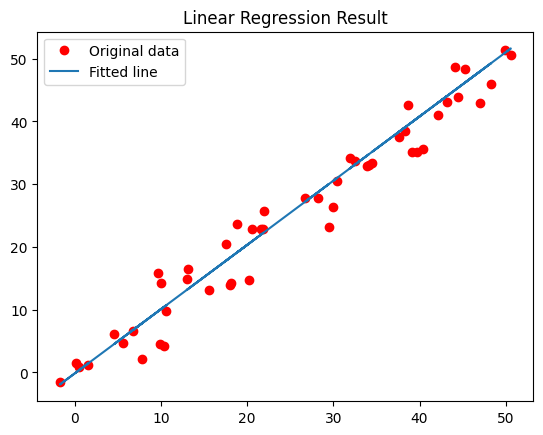

In [48]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()